In [2]:
import numpy as np
import pandas as pd

# Constants
NUM_ROWS = 300000
accident_probability = 0.0007904958704959287

# Age distributions
age_groups = {
    '17-18': (17, 18, 0.0035),
    '19-24': (19, 24, 0.0565),
    '25-34': (25, 34, 0.1274),
    '35-44': (35, 44, 0.1265),
    '45-54': (45, 54, 0.0983),
    '55-64': (55, 64, 0.0638),
    '65+': (65, 100, 0.0504)
}
age_proportions = [group[2] for group in age_groups.values()]
age_proportions = np.array(age_proportions) / sum(age_proportions)  # Normalize
age_group_names = list(age_groups.keys())

# Area distributions
area_categories = ['Valleys Area', 'Negev Area', 'Hasharon Area', 'Coastal Area',
                   'Eilat Area', 'Lachish Area', 'Jerusalem District', 'Haifa Area',
                   'Galilee Area', 'Shomron Area']
area_proportions = [7.90, 7.61, 34.77, 13.09, 3.07, 7.88, 4.00, 8.49, 10.54, 2.65]
area_proportions = np.array(area_proportions) / sum(area_proportions)  # Normalize

# Road type distributions
road_types = ['Urban', 'Non-Urban']
road_type_proportions = [0.5693, 0.4307]
road_type_probs = [0.2645, 0.7355]  # Probabilities for accidents (Non-Urban, Urban)

# Time distributions
hours = list(range(24))
traffic_percentage = [0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
                      6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8]
time_proportions = np.array(traffic_percentage) / sum(traffic_percentage)  # Normalize
hour_probs = [0.0950, 0.1154, 0.1248, 0.1047, 0.0563, 0.0563, 0.0563, 0.0563,
              0.0563, 0.0563, 0.0563, 0.0563, 0.0563, 0.0563, 0.0600, 0.0500,
              0.0350, 0.0250, 0.0150, 0.0080, 0.0076, 0.0076, 0.0076, 0.0076]

# Police unit probabilities
police_unit_probs = [0.2059, 0.1998, 0.0422, 0.0565, 0.0893, 0.0772, 0.0787, 0.0598, 0.1052, 0.0853]

# Age group probabilities
age_group_probs = [0.1929, 0.1692, 0.1428, 0.1265, 0.1177, 0.1160, 0.1349]

# Generate Data
np.random.seed(42)  # For reproducibility

# ID
ids = np.arange(1, NUM_ROWS + 1)

# Age Group Assignment
age_group_choices = np.random.choice(age_group_names, size=NUM_ROWS, p=age_proportions)

# Assign a specific age within each group
age_choices = []
for group in age_group_choices:
    min_age, max_age, _ = age_groups[group]
    age_choices.append(np.random.randint(min_age, max_age + 1))  # Uniformly within group

# Area
area_choices = np.random.choice(area_categories, size=NUM_ROWS, p=area_proportions)

# Road Type
road_choices = np.random.choice(road_types, size=NUM_ROWS, p=road_type_proportions)

# Time (hour, minute, second)
hour_choices = np.random.choice(hours, size=NUM_ROWS, p=time_proportions)
minute_choices = np.random.randint(0, 60, size=NUM_ROWS)
second_choices = np.random.randint(0, 60, size=NUM_ROWS)
time_choices = [f"{hour:02}:{minute:02}:{second:02}" for hour, minute, second in zip(hour_choices, minute_choices, second_choices)]

# Combine into a DataFrame
synthetic_data = pd.DataFrame({
    "ID": ids,
    "Age": age_choices,
    "Area": area_choices,
    "Road Type": road_choices,
    "Time": time_choices,
    "Accident": None  # Placeholder for accident labels
})

# Function to calculate accident probability
def calculate_accident_probability(row, base_prob):
    # Adjust for road type
    road_type_index = 0 if row['Road Type'] == 'Non-Urban' else 1
    road_type_weight = road_type_probs[road_type_index]

    # Adjust for area
    area_index = area_categories.index(row['Area'])
    area_weight = police_unit_probs[area_index]

    # Adjust for age group
    for group_name, (min_age, max_age, _) in age_groups.items():
        if min_age <= row['Age'] <= max_age:
            age_index = age_group_names.index(group_name)
            age_weight = age_group_probs[age_index]
            break

    # Adjust for time
    hour = int(row['Time'].split(':')[0])
    time_weight = hour_probs[hour]

    # Calculate final weighted probability
    weighted_prob = base_prob * road_type_weight * area_weight * age_weight * time_weight
    return weighted_prob

# Generate accident labels
np.random.seed(42)  # For reproducibility
accident_labels = []

for _, row in synthetic_data.iterrows():
    accident_prob = calculate_accident_probability(row, accident_probability)
    accident_labels.append(1 if np.random.rand() < accident_prob else 0)

# Add accident labels to the dataset
synthetic_data['Accident'] = accident_labels

# Save the updated dataset
output_file_path = '/Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/simulated_trip_dataset_with_accidents.csv'
synthetic_data.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")

Updated dataset saved to: /Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/simulated_trip_dataset_with_accidents.csv


In [3]:
import numpy as np
import pandas as pd

# Constants
NUM_ROWS = 300000
accident_probability = 0.0007904958704959287

# Age distributions
age_groups = {
    '17-18': (17, 18, 0.0035),
    '19-24': (19, 24, 0.0565),
    '25-34': (25, 34, 0.1274),
    '35-44': (35, 44, 0.1265),
    '45-54': (45, 54, 0.0983),
    '55-64': (55, 64, 0.0638),
    '65+': (65, 100, 0.0504)
}
age_proportions = [group[2] for group in age_groups.values()]
age_proportions = np.array(age_proportions) / sum(age_proportions)
age_group_names = list(age_groups.keys())

# Area distributions
area_categories = ['Valleys Area', 'Negev Area', 'Hasharon Area', 'Coastal Area',
                   'Eilat Area', 'Lachish Area', 'Jerusalem District', 'Haifa Area',
                   'Galilee Area', 'Shomron Area']
area_proportions = [7.90, 7.61, 34.77, 13.09, 3.07, 7.88, 4.00, 8.49, 10.54, 2.65]
area_proportions = np.array(area_proportions) / sum(area_proportions)

# Road type distributions
road_types = ['Urban', 'Non-Urban']
road_type_proportions = [0.5693, 0.4307]
road_type_probs = [0.2645, 0.7355]  # Probabilities for accidents (Non-Urban, Urban)

# Time distributions
hours = list(range(24))
traffic_percentage = [0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
                      6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8]
time_proportions = np.array(traffic_percentage) / sum(traffic_percentage)
hour_probs = [
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]

# Function to calculate accident probability using Bayes' Theorem
def calculate_bayes_probability(row, base_prob):
    # Numerator: P(Time, Area, Age, Road Type | Accident) * P(Accident)
    time_weight = hour_probs[int(row['Time'].split(':')[0])]
    area_weight = police_unit_probs[area_categories.index(row['Area'])]
    age_weight = age_group_probs[next(i for i, (min_age, max_age, _) in enumerate(age_groups.values())
                                      if min_age <= row['Age'] <= max_age)]
    road_type_weight = road_type_probs[0 if row['Road Type'] == 'Non-Urban' else 1]
    numerator = base_prob * time_weight * area_weight * age_weight * road_type_weight

    # Denominator: P(Time, Area, Age, Road Type)
    denominator = time_weight * area_weight * age_weight * road_type_weight

    return numerator / denominator

# Generate accident labels for each row according to the calculated probability
np.random.seed(42)
synthetic_data['Accident'] = synthetic_data.apply(
    lambda row: 1 if np.random.rand() < calculate_bayes_probability(row, accident_probability) else 0,
    axis=1
)

# Save the updated dataset
output_file_path = '/Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/simulated_trip_dataset_with_accidents.csv'
synthetic_data.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")

Updated dataset saved to: /Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/simulated_trip_dataset_with_accidents.csv


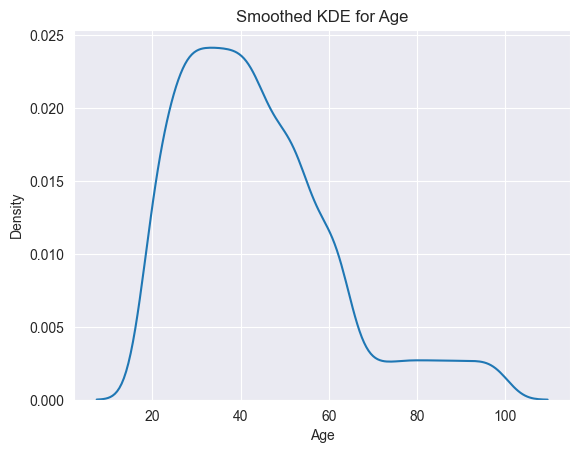

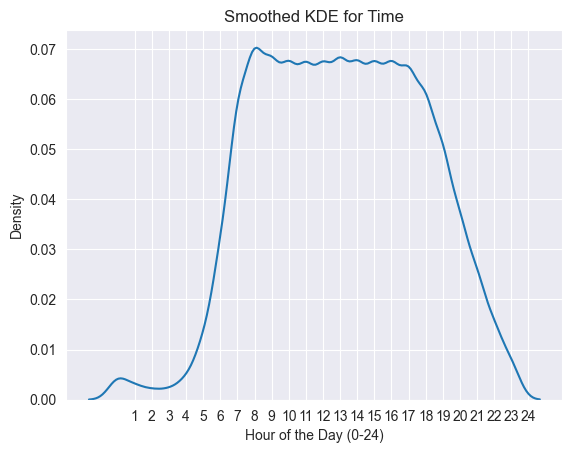

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data for Age
age_data = []
for group, (min_age, max_age, prob) in age_groups.items():
    count = int(prob * NUM_ROWS)
    age_data.extend(np.random.randint(min_age, max_age + 1, size=count))

# Generate synthetic data for Time
time_data = np.random.choice(hours, size=NUM_ROWS, p=time_proportions)

# KDE for Age
sns.kdeplot(age_data, bw_adjust=2.0)
plt.title("Smoothed KDE for Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# KDE for Time with x-axis as 0-24 hours
sns.kdeplot(time_data, bw_adjust=1.5)
plt.title("Smoothed KDE for Time")
plt.xlabel("Hour of the Day (0-24)")
plt.xticks(range(1, 25, 1))  # Set x-ticks explicitly for each hour
plt.ylabel("Density")
plt.show()


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# Constants
NUM_ROWS = 300000

# Area distributions
area_categories = ['Valleys Area', 'Negev Area', 'Hasharon Area', 'Coastal Area',
                   'Eilat Area', 'Lachish Area', 'Jerusalem District', 'Haifa Area',
                   'Galilee Area', 'Shomron Area']
area_proportions = [7.90, 7.61, 34.77, 13.09, 3.07, 7.88, 4.00, 8.49, 10.54, 2.65]
area_proportions = np.array(area_proportions) / sum(area_proportions)

# Road type distributions
road_types = ['Urban', 'Non-Urban']
road_type_proportions = [0.5693, 0.4307]

# Generate synthetic data for KDE
# Simulated Age Data (from distributions)
age_groups = {
    '17-18': (17, 18, 0.0035),
    '19-24': (19, 24, 0.0565),
    '25-34': (25, 34, 0.1274),
    '35-44': (35, 44, 0.1265),
    '45-54': (45, 54, 0.0983),
    '55-64': (55, 64, 0.0638),
    '65+': (65, 100, 0.0504)
}
age_data = []
for group, (min_age, max_age, prob) in age_groups.items():
    count = int(prob * NUM_ROWS)
    age_data.extend(np.random.randint(min_age, max_age + 1, size=count))

# Simulated Time Data (from hourly traffic distribution)
hours = list(range(24))
traffic_percentage = [0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
                      6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8]
time_proportions = np.array(traffic_percentage) / sum(traffic_percentage)
time_data = np.random.choice(hours, size=NUM_ROWS, p=time_proportions)

# ----------------------- Part 1: KDE for Age and Time -----------------------


In [4]:
# KDE for Age
age_kde = gaussian_kde(age_data)
sampled_ages = age_kde.resample(NUM_ROWS).flatten()
sampled_ages = np.clip(sampled_ages, 17, 100).astype(int)  # Clip to realistic age bounds

# KDE for Time
time_kde = gaussian_kde(time_data)
sampled_times = time_kde.resample(NUM_ROWS).flatten()
sampled_times = np.clip(sampled_times, 0, 23).astype(int)  # Clip to 24-hour bounds

# Generate Time Strings
minute_choices = np.random.randint(0, 60, size=NUM_ROWS)
second_choices = np.random.randint(0, 60, size=NUM_ROWS)
sampled_time_strings = [f"{hour:02}:{minute:02}:{second:02}" for hour, minute, second in zip(sampled_times, minute_choices, second_choices)]

# ----------------------- Part 1: Generate Random Dataset -----------------------


In [5]:
# IDs
ids = np.arange(1, NUM_ROWS + 1)

# Assign random areas and road types
area_choices = np.random.choice(area_categories, size=NUM_ROWS, p=area_proportions)
road_choices = np.random.choice(road_types, size=NUM_ROWS, p=road_type_proportions)

# Create the DataFrame
random_data = pd.DataFrame({
    "ID": ids,
    "Age": sampled_ages,  # KDE-based ages
    "Area": area_choices,
    "Road Type": road_choices,
    "Time": sampled_time_strings  # KDE-based times
})

# Save the random dataset
random_dataset_path = '/Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/random_dataset.csv'
random_data.to_csv(random_dataset_path, index=False)

print(f"Random dataset saved to: {random_dataset_path}")

Random dataset saved to: /Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/random_dataset.csv


KDE Plot for Age Distribution Using Accident Data

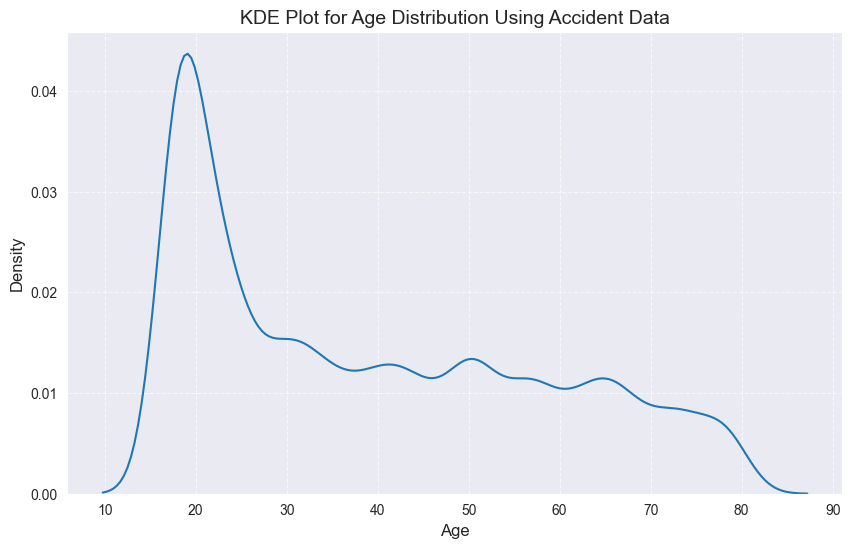

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data provided
age_group_probs = [0.1929, 0.1692, 0.1428, 0.1265, 0.1177, 0.1160, 0.1349]
age_groups = ['17-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Generate age values based on probabilities
age_values = []

for group, prob in zip(age_groups, age_group_probs):
    size = int(prob * 1000)  # Scale to generate a proportional sample size
    if '-' in group:
        low, high = map(int, group.split('-'))
        age_values.extend(np.random.uniform(low=low, high=high + 1, size=size))
    else:  # Handle '65+' group
        age_values.extend(np.random.uniform(low=65, high=80, size=size))

# Convert to NumPy array for compatibility
age_values = np.array(age_values, dtype=float)

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(age_values, bw_adjust=0.5)
plt.title('KDE Plot for Age Distribution Using Accident Data', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


KDE Plot for Hourly Accident Distribution Based on Accident Data

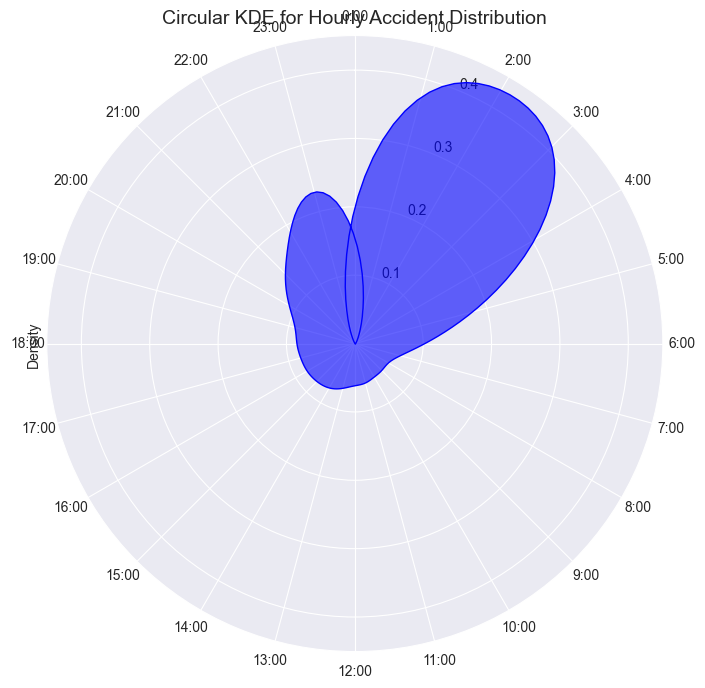

In [45]:
# Circular KDE Plot for Hourly Accident Distribution Based on Accident Data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Updated probabilities
hours = list(range(24))
normalized_scaled_array = [
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]

# Generate hour values based on updated probabilities
hour_values = []
for hour, prob in zip(hours, normalized_scaled_array):
    size = int(prob * 1000)  # Scale to generate a proportional sample size
    hour_values.extend(np.random.uniform(low=hour, high=hour + 1, size=size))

# Convert hour values to angles for circular plot (24-hour cycle)
angles = np.deg2rad(np.array(hour_values) * 15)  # Convert hours to degrees (15° per hour)

# Create the circular KDE plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
sns.kdeplot(angles, bw_adjust=0.4, fill=True, alpha=0.6, ax=ax, color="blue")
ax.set_theta_direction(-1)  # Set clockwise direction
ax.set_theta_offset(np.pi / 2)  # Set 12 o'clock as the top

# Customize the plot
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))  # Set hour labels
ax.set_xticklabels([f"{i}:00" for i in range(24)])  # Format hour labels
ax.set_title('Circular KDE for Hourly Accident Distribution', va='bottom', fontsize=14)

plt.show()

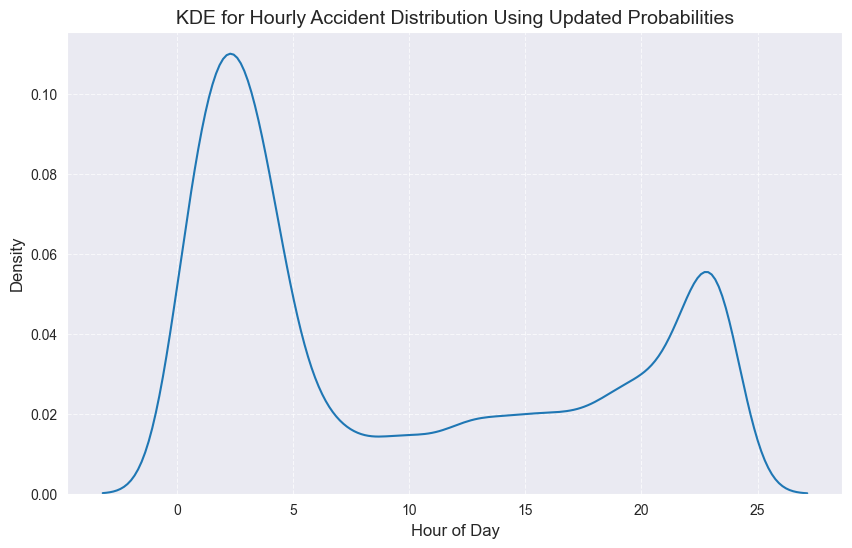

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Updated probabilities
hours = list(range(24))
normalized_scaled_array = [
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]

# Generate hour values based on updated probabilities
hour_values = []
for hour, prob in zip(hours, normalized_scaled_array):
    size = int(prob * 1000)  # Scale to generate a proportional sample size
    hour_values.extend(np.random.uniform(low=hour, high=hour + 1, size=size))

# Convert to NumPy array for compatibility
hour_values = np.array(hour_values, dtype=float)

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(hour_values, bw_adjust=0.5)
plt.title('KDE for Hourly Accident Distribution Using Updated Probabilities', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()